In [27]:
from IPython.display import HTML
file_path = 'directmethods.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import cond, solve, norm
from scipy.linalg import hilbert


def test_matrix(A):
    # Compute the right-hand side of the linear system
    n = A.shape[0]
    x_true = np.ones((n, 1))
    b = A @ x_true
    # Compute the condition number in 2-norm, inf-norm of the matrix A.
    cond_2norm = np.linalg.cond(A, 2)
    cond_infnorm = np.linalg.cond(A, np.Inf)
    # Solve the linear system
    x_computed = np.linalg.solve(A, b)
    # Compute the relative error
    rel_err = np.linalg.norm(x_computed - x_true) / np.linalg.norm(x_true)

    return {
        'cond_2norm': cond_2norm,
        'cond_infnorm': cond_infnorm,
        'relative_error': rel_err,
        'x_computed': x_computed
    }


def collect_results(n_values, matrix_generator_method):
    results = []
    for n in n_values:
        A = matrix_generator_method(n)
        results.append(test_matrix(A))

    df_results = pd.DataFrame(results, index=n_values)
    df_results.index.name = 'n'
    df_results.columns = ['Cond. Number (2-norm)', 'Cond. Number (Inf-norm)', 'Relative Error', 'Computed Solution']

    return df_results


def plot_results(df_results, use_log_scale=False):
    n_values = df_results.index
    cond_2norm = df_results['Cond. Number (2-norm)']
    cond_infnorm = df_results['Cond. Number (Inf-norm)']
    relative_errors = df_results['Relative Error']

    from IPython.display import display
    display(df_results)

    plt.figure(figsize=(14, 7))

    # Plot condition numbers
    plt.subplot(1, 2, 1)
    plt.plot(n_values, cond_2norm, marker='o', label='2-norm')
    plt.plot(n_values, cond_infnorm, marker='x', label='Inf-norm')
    plt.xlabel('Matrix Size (n)')
    plt.ylabel('Condition Number')
    plt.title('Condition Numbers by Matrix Size')
    plt.legend()
    plt.grid(True)
    if use_log_scale == True:
        plt.yscale('log')

    # Plot relative errors
    plt.subplot(1, 2, 2)
    plt.plot(n_values, relative_errors, marker='o', color='red')
    plt.xlabel('Matrix Size (n)')
    plt.ylabel('Relative Error')
    plt.title('Relative Errors by Matrix Size')
    plt.grid(True)
    if use_log_scale == True:
        plt.yscale('log')

    plt.tight_layout()
    plt.show()


In [29]:
from IPython.display import HTML
file_path = 'testdirect.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)


,Cond. Number (2-norm),Cond. Number (Inf-norm),Relative Error,Computed Solution
n,,,,
10,34.711911,56.796580,9.524652e-16,"[[0.9999999999999983], [0.9999999999999998], [..."
20,3517.860003,9652.966566,9.349128e-14,"[[0.9999999999999681], [1.0000000000002296], [..."
30,245.448757,462.550456,4.370482e-15,"[[0.999999999999995], [1.0000000000000033], [1..."
40,339.359200,728.915160,3.373050e-15,"[[1.000000000000006], [0.9999999999999971], [0..."
50,601.485861,1470.955320,2.827590e-14,"[[0.9999999999999627], [0.9999999999999843], [..."
60,1306.634926,2750.899823,2.922135e-14,"[[1.0000000000000402], [0.9999999999999811], [..."
70,1725.583711,3730.687412,1.234620e-14,"[[1.0000000000000036], [0.9999999999999981], [..."
80,1490.162874,3449.946695,1.401876e-14,"[[0.9999999999999808], [0.9999999999999745], [..."
90,2639.538119,6882.268561,1.658335e-14,"[[0.9999999999999761], [0.9999999999999626], [..."


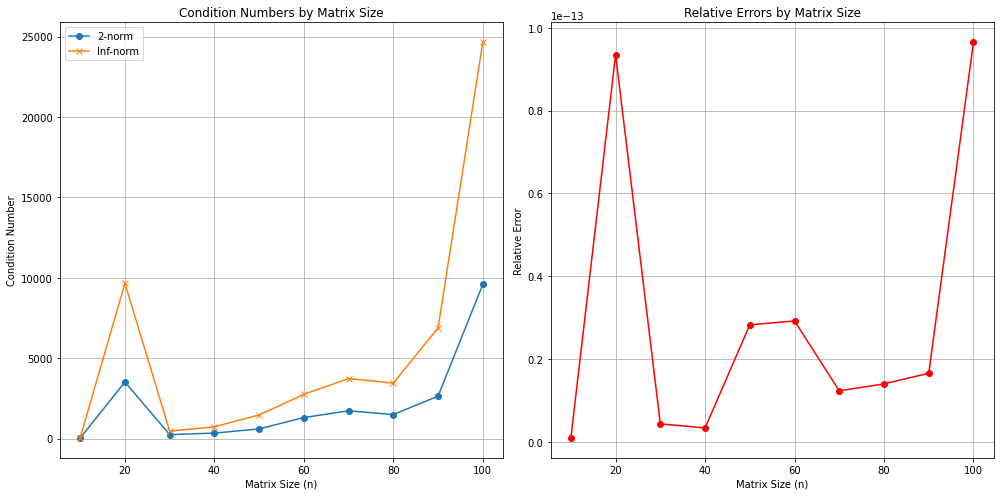

In [30]:
def generate_random_matrix(n):
    return np.random.rand(n, n)


n_values_random = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df_results_random = collect_results(n_values_random, generate_random_matrix)
plot_results(df_results_random)


,Cond. Number (2-norm),Cond. Number (Inf-norm),Relative Error,Computed Solution
n,,,,
5,2.616969e+04,4.373600e+04,0.000000e+00,"[[1.0], [1.0], [1.0], [1.0], [1.0]]"
10,2.106258e+12,3.306441e+12,1.149609e-05,"[[1.0000089010620377], [0.9999770272930356], [..."
15,9.779498e+19,4.364096e+21,1.126013e+04,"[[6355.7519780169605], [-20567.51488859526], [..."
20,2.553436e+19,1.112113e+24,7.708640e+06,"[[5745950.675963491], [-17600470.65467011], [2..."
25,8.148528e+19,6.351061e+22,4.097123e+05,"[[431450.8498546948], [-1209193.380217855], [1..."
30,2.978608e+20,2.472934e+22,5.232309e+04,"[[71453.09013888257], [-184817.2728041462], [1..."


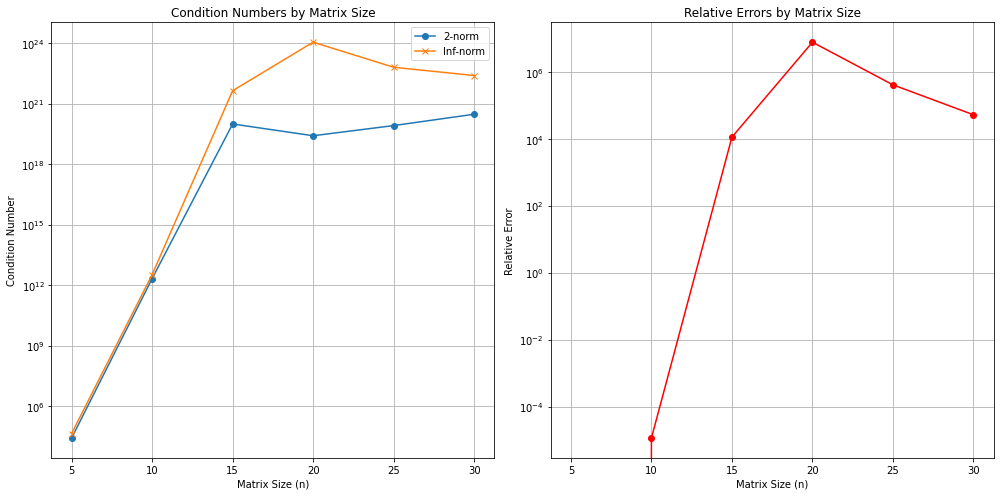

In [35]:
def generate_vandermonde(n):
    x = np.arange(1, n+1)
    return np.vander(x, increasing=True)


n_values_vandermonde = [5, 10, 15, 20, 25, 30]
df_results_vandermonde = collect_results(
    n_values_vandermonde, generate_vandermonde)
plot_results(df_results_vandermonde, use_log_scale=True)


,Cond. Number (2-norm),Cond. Number (Inf-norm),Relative Error,Computed Solution
n,,,,
4,1.551374e+04,2.837500e+04,4.137410e-14,"[[1.0000000000000016], [0.9999999999999747], [..."
5,4.766073e+05,9.436560e+05,1.682843e-12,"[[0.9999999999999578], [1.0000000000006084], [..."
6,1.495106e+07,2.907028e+07,1.424244e-10,"[[0.9999999999995299], [1.0000000000129634], [..."
7,4.753674e+08,9.851949e+08,7.637452e-09,"[[0.9999999999949462], [1.000000000201242], [0..."
8,1.525758e+10,3.387279e+10,6.124090e-08,"[[1.0000000000077225], [0.999999999572896], [1..."
9,4.931538e+11,1.099652e+12,3.875163e-06,"[[0.9999999998920663], [1.000000007398095], [0..."
10,1.602442e+13,3.535685e+13,8.670390e-05,"[[1.0000000004766838], [0.9999999590501241], [..."
11,5.222678e+14,1.234533e+15,8.383288e-04,"[[1.000000000940275], [0.9999999011815718], [1..."
12,1.751473e+16,4.255399e+16,3.249129e-01,"[[0.9999999311779082], [1.0000086893668683], [..."


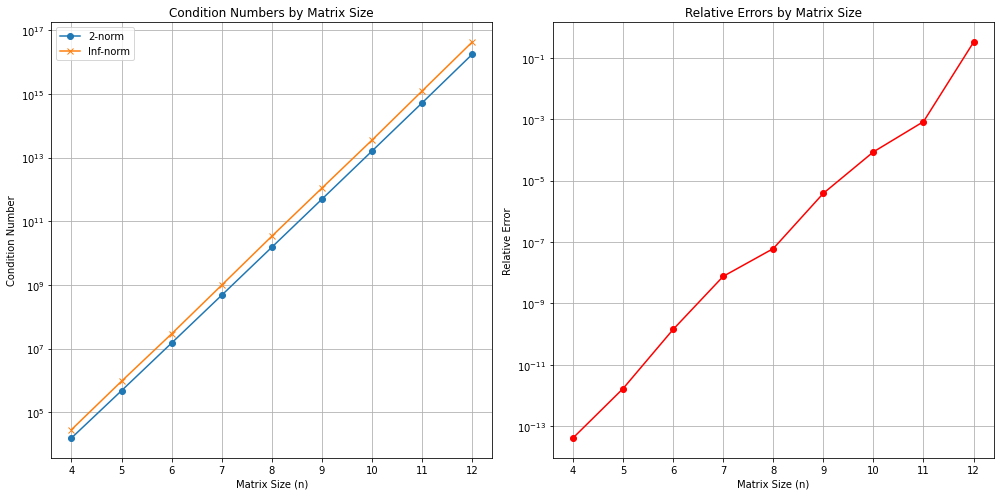

In [36]:
# Hilbert matrices are known for their ill conditioning number.
from scipy.linalg import hilbert


def generate_hilbert(n):
    return hilbert(n)


n_values_hilbert = [4, 5, 6, 7, 8, 9, 10, 11, 12]
df_results_hilbert = collect_results(n_values_hilbert, generate_hilbert)
plot_results(df_results_hilbert, use_log_scale=True)


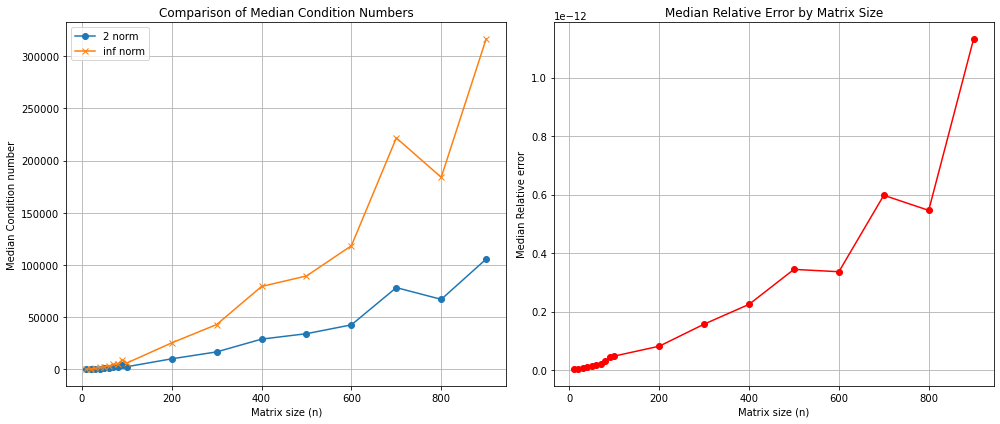

In [71]:
# Try reaching a more general result for random matrices 
n_values_random = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,200,300,400,500,600,700,800,900]
num_trials = 30

results = []

for n in n_values_random:
    for k in range(num_trials):
        A = np.random.rand(n,n)
        test_results = test_matrix(A)
        test_results['n'] = n
        results.append(test_results)

df_results = pd.DataFrame(results)
df_medians = df_results.groupby('n').median()
df_medians.columns = ['Cond. Number (2-norm)', 'Cond. Number (Inf-norm)', 'Relative Error']


n_values_random = df_medians.index
cond_2norm = df_medians['Cond. Number (2-norm)']
cond_infnorm = df_medians['Cond. Number (Inf-norm)']
rel_err = df_medians['Relative Error']

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(n_values_random,cond_2norm,label='2 norm',marker='o')
plt.plot(n_values_random,cond_infnorm,label='inf norm',marker='x')
plt.xlabel('Matrix size (n)')
plt.ylabel('Median Condition number')
plt.title('Comparison of Median Condition Numbers')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(n_values_random,rel_err,color='red',marker='o')
plt.xlabel('Matrix size (n)')
plt.ylabel('Median Relative error')
plt.title('Median Relative Error by Matrix Size')
plt.grid(True)

plt.tight_layout()
plt.show()

    